### Imports

In [1]:
# some imports we will need in this example

import multiDGD
import numpy as np
import mudata as md
#import anndata as ad
import scanpy as sc

### Data loading and preparation

Mudata objects can be used in this model just like an anndata object. Mudata objects are actually even easier to use, since the modality feature assignment does not have to be specified with the `modality_key` as for anndata objects.

In [2]:
# load some test data

# this is an example mudata object
data = md.read("../data/human_brain/mudata.h5mu", backed=False)
data = data[::5,:]
# set it up with the model (similar to MultiVI)
# but we support both anndata and mudata objects
data = multiDGD.functions._data.setup_data(data, observable_key='celltype')

/usr/local/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/usr/local/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/usr/local/lib/python3.10/site-packages/multiDGD/functions/_data.py:54: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  data.obs['observable'] = data.obs[observable_key]
/usr/local/lib/python3.10/site-packages/m

Otherwise everyhing is the same as for modeling anndata objects.

In [3]:
model = multiDGD.DGD(data=data)
model.view_data_setup()

selected  16  number of Gaussian mixture components based on the provided observable.
The prepared data consists of the following training set:

        omicsDataset:
            Number of samples: 503
            Modalities: ['rna', 'atac']
            Features per modality: [15172, 95677]
            Total number of features: 110849
            Scaling of values: sum
        
There is also a validation set with 63 samples
And a test set with 63 samples


Preparing data loaders
Now training
training for  100  epochs with early stopping ( loss )


Training: 100%|██████████| 100/100 [10:38<00:00,  6.39s/epochs, loss=0.411, reconstruction_loss=0.381]


#######################
Training status
#######################
True


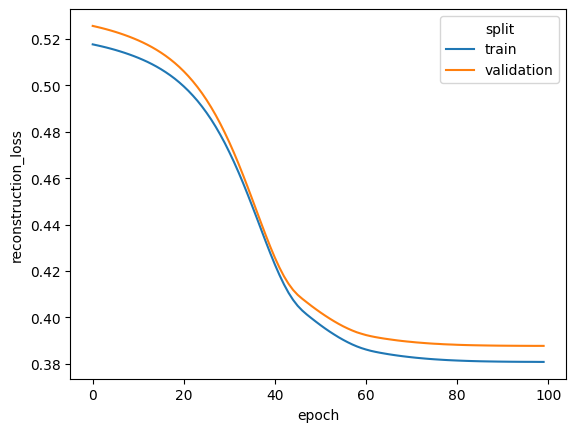

In [4]:
model.train(n_epochs=100)
model.plot_history()

/usr/local/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/usr/local/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/usr/local/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] 

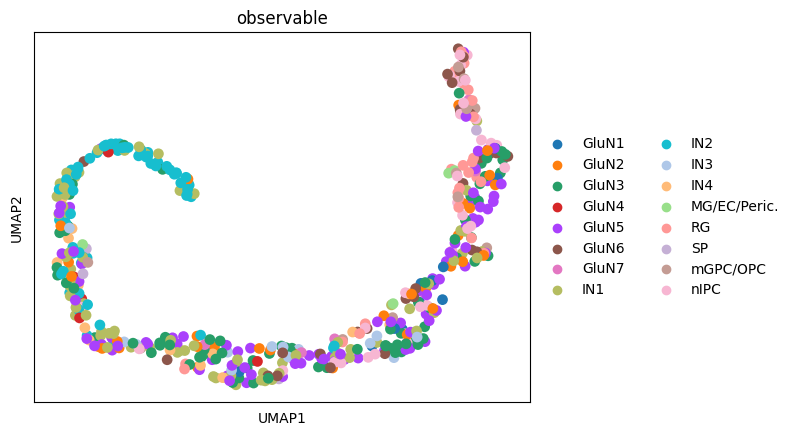

In [5]:
# visualize embeddings (scanpy conform)
# of the training data first

data_train = data.copy()[data.obs['train_val_test'] == 'train']
data_train.obsm['latent'] = model.get_representation()

sc.pp.neighbors(adata=data_train, use_rep='latent')
sc.tl.umap(data_train)
sc.pl.umap(data_train, color='observable')

In [6]:
# now test the held-out data

model.test() # same as model.predict(), all call predict_new() which is the "developer" method

making potential reps
   all potential reps:  torch.Size([16, 20])
calculating losses for each new sample and potential reps
training selected reps for  20  epochs


Training: 100%|██████████| 20/20 [00:19<00:00,  1.03epochs/s, loss=0.405, reconstruction_loss=0.401]


/usr/local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


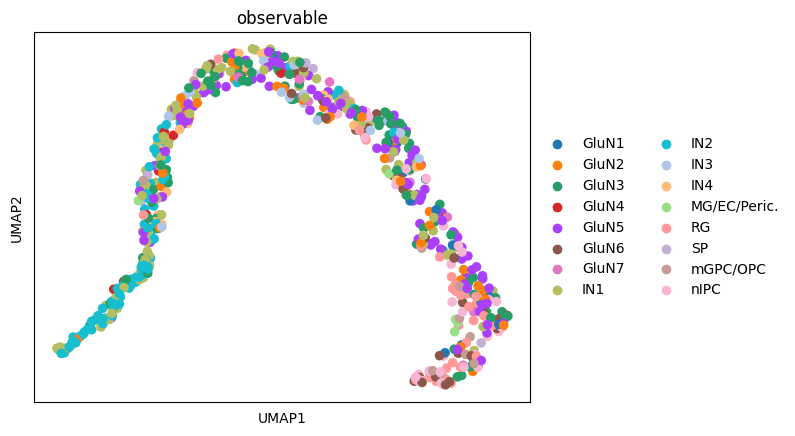

/usr/local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


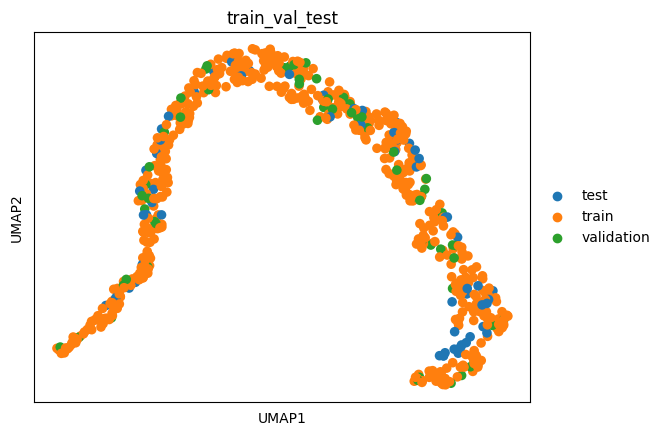

/usr/local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


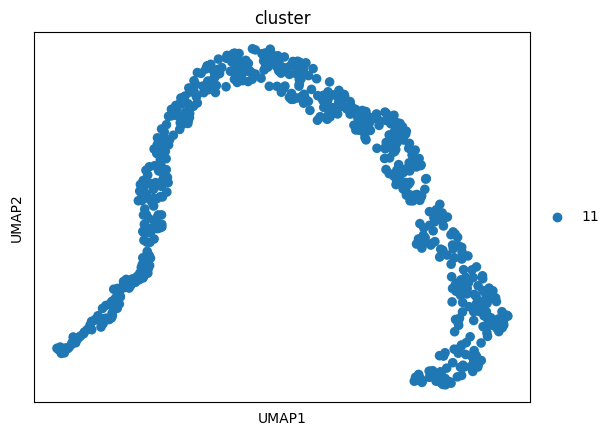

In [7]:
# now visualize the embeddings of all data (train, val, test)
# by cell type, cluster assignment and the data split

data.obsm['latent'] = model.get_representation(split='all')
data.obs['cluster'] = model.clustering(split='all').astype(str)

sc.pp.neighbors(adata=data, use_rep='latent')
sc.tl.umap(data)
sc.pl.umap(data, color='observable')
sc.pl.umap(data, color='train_val_test')
sc.pl.umap(data, color='cluster')